<a href="https://colab.research.google.com/github/XL636/Neural-network-learning-/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden layer1 --> H2 --> output
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
#Pick a manual seed for randonmization
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model().to(device)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# load data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
my_df.head(
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)

/tmp/ipython-input-846874311.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2)


In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Train Test Split, Set X y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
# Convert to numpy arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
# Convert X features to float tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
X_test[:3],y[:3]

(tensor([[6.1000, 2.8000, 4.7000, 1.2000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [7.7000, 2.6000, 6.9000, 2.3000]]),
 array([0, 0, 0]))

In [ ]:
# Set Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [ ]:
#epoches
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predict results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')

  #
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch:0 and loss: 1.0846847295761108
Epoch:10 and loss: 0.9183797240257263
Epoch:20 and loss: 0.7622429728507996
Epoch:30 and loss: 0.6273833513259888
Epoch:40 and loss: 0.4667472541332245
Epoch:50 and loss: 0.28770601749420166
Epoch:60 and loss: 0.16738919913768768
Epoch:70 and loss: 0.10598888993263245
Epoch:80 and loss: 0.0802135244011879
Epoch:90 and loss: 0.06947019696235657


Text(0, 0.5, 'Epoch')

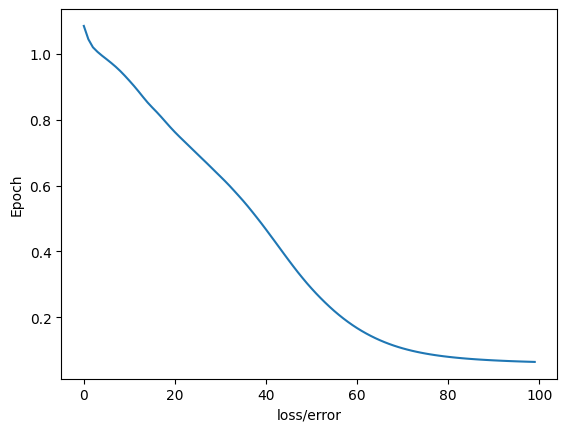

In [ ]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.xlabel('loss/error')
plt.ylabel('Epoch')

# Test

In [ ]:
# Evaluate Model on Test Data Set(Validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
 y_eval = model.forward(X_test) # X_tes are featrues from our test set, y_eval will be the prediction
 loss = criterion(y_eval,y_test) # Find the loss or error

In [ ]:
loss

tensor(0.0634)

In [ ]:
correct = 0
with torch.no_grad(): # Basically turn off back propogation
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    # Will tell us what type of flower calss our network think it is
    print(f'{i+1}.) {str(y_val)}: {y_test[i]}:{y_val.argmax().item()}')

    # What class does the network think it is?
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'\nWe got {correct} correct!')

1.) tensor([-1.4120,  6.3132,  2.6088]): 1:1
2.) tensor([ 8.4023,  2.4573, -7.5391]): 0:0
3.) tensor([-12.1991,   1.1829,  13.7443]): 2:2
4.) tensor([-1.6752,  5.9271,  2.8622]): 1:1
5.) tensor([-1.5887,  6.7559,  2.8371]): 1:1
6.) tensor([ 7.8451,  2.3289, -7.0010]): 0:0
7.) tensor([ 1.1273,  6.0707, -0.0493]): 1:1
8.) tensor([-5.2088,  4.4484,  6.5316]): 2:2
9.) tensor([-3.2614,  4.9128,  4.4788]): 1:1
10.) tensor([0.5683, 6.5565, 0.5445]): 1:1
11.) tensor([-4.3492,  4.7780,  5.6344]): 2:2
12.) tensor([ 7.3631,  2.0552, -6.5497]): 0:0
13.) tensor([ 8.1384,  2.3552, -7.2879]): 0:0
14.) tensor([ 7.4936,  2.1057, -6.6740]): 0:0
15.) tensor([ 7.8643,  2.2491, -7.0269]): 0:0
16.) tensor([-1.3322,  6.5325,  2.5448]): 1:1
17.) tensor([-8.2712,  2.4244,  9.6406]): 2:2
18.) tensor([0.3374, 6.4826, 0.7657]): 1:1
19.) tensor([-1.5909,  5.7677,  2.7565]): 1:1
20.) tensor([-8.1891,  2.2739,  9.5411]): 2:2
21.) tensor([ 7.2431,  2.0816, -6.4291]): 0:0
22.) tensor([-3.9169,  4.6616,  5.1603]): 2:2


In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [ ]:
torch.manual_seed(42)
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.3094,  2.0344, -6.4986])


In [ ]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [ ]:
with torch.no_grad():
  y_val = model(newer_iris)
  print(f'{y_val}:{y_val.argmax().item()}')

tensor([-4.9424,  3.9152,  6.1960]):2


# Save Model

In [ ]:
# Save model
torch.save(model.state_dict(), 'Simple_NN_Model_iris')

In [ ]:
# Load model
new_model = Model()
new_model.load_state_dict(torch.load('Simple_NN_Model_iris'))

In [ ]:
# Make sure it load correctly
new_model.eval()